In [324]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [325]:
#Loading the dataset
data=pd.read_csv('data.csv')

In [326]:
#Seperating labels from features
y=data.iloc[:,0].values
X=data.iloc[:,1:].values

In [327]:
#Splitting the data into 80% training sets and 20% testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [328]:
#Standardizing feature values
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test)

In [330]:
#List of activation functions used
ActivationFunctions=['relu','logistic','identity','tanh']

for activation in ActivationFunctions:
    # Creating an MLP classifier 
    mlp=MLPClassifier(hidden_layer_sizes=(64,32,16),activation=activation,random_state=42,max_iter=100,early_stopping=True)
    
    # Training the MLP model 
    mlp.fit(X_train,y_train)
    
    y_pred=mlp.predict(X_test)
    
    #Calculating the accuracy
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[activation]=accuracy

In [331]:
for activation,accuracy in accuracy_results.items():
    print(f'Accuracy with {activation} activation: {accuracy*100:.2f}%')

Accuracy with relu activation: 77.27%
Accuracy with logistic activation: 64.29%
Accuracy with identity activation: 72.73%
Accuracy with tanh activation: 71.43%


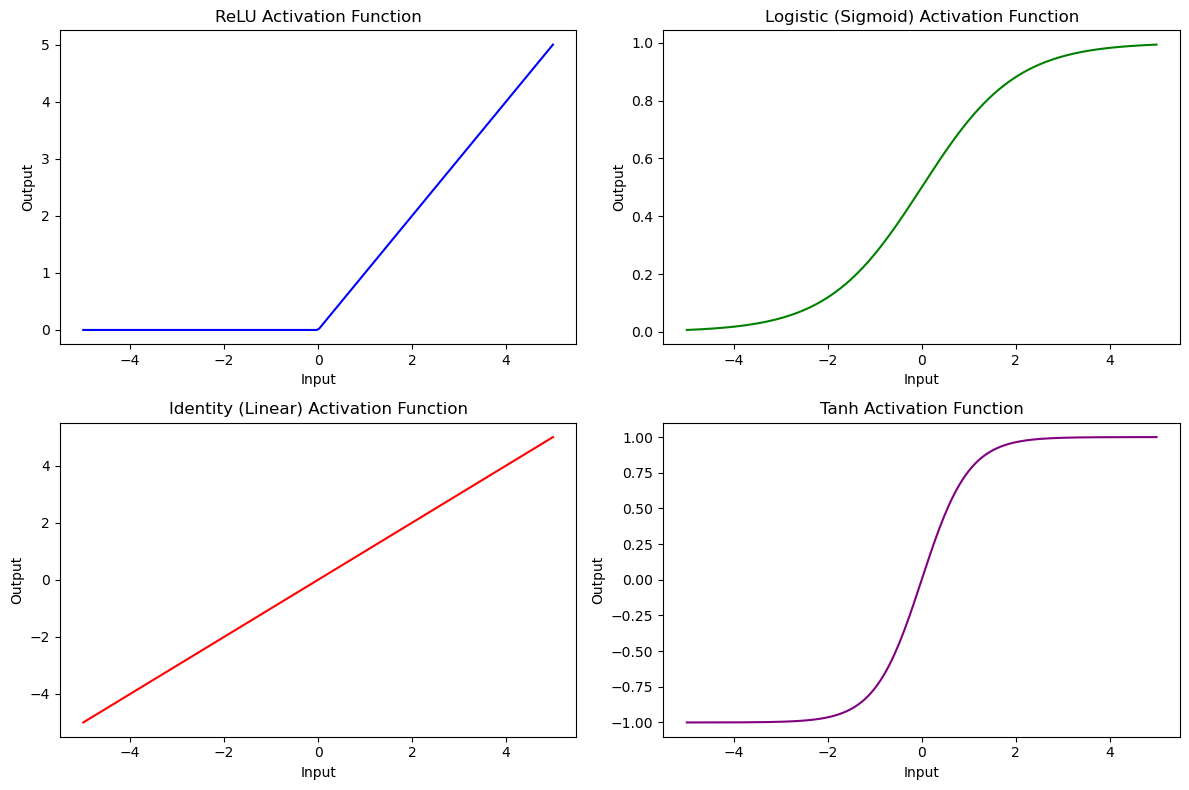

In [332]:
#Graphical representation of activation functions
import numpy as np
import matplotlib.pyplot as plt

#Define a range of input values
x=np.linspace(-5,5,200)  

#Define the four activation functions
relu=np.maximum(0,x)
logistic=1/(1+np.exp(-x))
identity=x
tanh=np.tanh(x)

#Create subplots for each activation function
plt.figure(figsize=(12,8))

#ReLU
plt.subplot(2,2,1)
plt.plot(x,relu,label='ReLU',color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')

#Logistic(Sigmoid)
plt.subplot(2,2,2)
plt.plot(x,logistic,label='Logistic',color='green')
plt.title('Logistic (Sigmoid) Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')

#Identity(Linear)
plt.subplot(2,2,3)
plt.plot(x,identity,label='Identity',color='red')
plt.title('Identity (Linear) Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')

#Tanh
plt.subplot(2,2,4)
plt.plot(x, tanh,label='Tanh',color='purple')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')

plt.tight_layout()
plt.show()
